# Sentimental analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# import some functions from another Jupyter
%run 0_all_functions.ipynb

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/valentinaolaritei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/valentinaolaritei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/valentinaolaritei/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
path = './sp500_news_and_sentimental.csv'
df = pd.read_csv(path)
df.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)
df.head(-5)

ticker                   date  \
0         zts   5/22/2013 2:52:27 PM   
1         zts   6/24/2013 4:28:40 PM   
2         zts  6/25/2015 10:35:18 PM   
3         zts  5/10/2016 12:57:59 AM   
4         zts   2/27/2017 1:10:00 PM   
...       ...                    ...   
581697    brk    2013-03-02 00:54:09   
581698    brk    2013-03-02 00:53:43   
581699    brk    2013-02-15 07:51:41   
581700    brk    2013-02-14 19:30:04   
581701    brk    2013-02-14 14:29:35   

                                                    title       source  \
0         Pfizer to spin off Zoetis stake to shareholders      Reuters   
1       Pfizer says shareholders snap up remaining Zoe...      Reuters   
2                       Valeant offers to buy Zoetis: WSJ      Reuters   
3       Ackman's Pershing Square seeks to sell Zoetis ...      Reuters   
4       Technical Reports on Generic Drugs Stocks -- Z...  PR Newswire   
...                                                   ...          ...   
581697      Buffett: Performance streak may end this year      Reuters   
581698      Buffett: Performance streak may end this year      Reuters   
581699  Buffett, Brazil's 3G team up for $23 billion H...      Reuters   
581700  Heinz $23 billion sale to Buffett, 3G to spur ...      Reuters   
581701  Berkshire Hathaway, 3G Capital to buy Heinz fo...      Reuters   

                                              link_source  positivity_text  \
0       http://feeds.reuters.com/~r/reuters/businessNe...            0.000   
1       http://feeds.reuters.com/~r/reuters/businessNe...            0.239   
2       http://feeds.reuters.com/~r/reuters/businessNe...            0.000   
3       http://feeds.reuters.com/~r/reuters/businessNe...            0.167   
4       https://markets.businessinsider.com/news/stock...            0.000   
...                                                   ...              ...   
581697  http://feeds.reuters.com/~r/reuters/businessNe...            0.000   
581698  http://feeds.reuters.com/~r/reuters/INbusiness...            0.000   
581699  http://feeds.reuters.com/~r/reuters/businessNe...            0.000   
581700  http://feeds.reuters.com/~r/reuters/INbusiness...            0.000   
581701  http://feeds.reuters.com/~r/reuters/businessNe...            0.000   

        neutrality_text  negativity_text  compound_text               stock  \
0                 1.000              0.0          0.000              Zoetis   
1                 0.761              0.0          0.296              Zoetis   
2                 1.000              0.0          0.000              Zoetis   
3                 0.833              0.0          0.296              Zoetis   
4                 1.000              0.0          0.000              Zoetis   
...                 ...              ...            ...                 ...   
581697            1.000              0.0          0.000  Berkshire Hathaway   
581698            1.000              0.0          0.000  Berkshire Hathaway   
581699            1.000              0.0          0.000  Berkshire Hathaway   
581700            1.000              0.0          0.000  Berkshire Hathaway   
581701            1.000              0.0          0.000  Berkshire Hathaway   

       gisc_sectors  
0       Health Care  
1       Health Care  
2       Health Care  
3       Health Care  
4       Health Care  
...             ...  
581697   Financials  
581698   Financials  
581699   Financials  
581700   Financials  
581701   Financials  

[581702 rows x 11 columns]

In [4]:
# convert into datetime for the plots
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.shape

/var/folders/tp/_pk1n96524l_vsmbtrwqn7jc0000gn/T/ipykernel_92984/3876718612.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


(581707, 13)

In [5]:
# replace empty cells with NaN in order to drop them
df.replace('', np.nan, inplace=True)
df.dropna(inplace=True)
df.shape

(581707, 13)

# Overall sentimental for each year

In [6]:
# compute the means for each year
mean_positivity_year = df.groupby('year')['positivity_text'].mean().reset_index()
mean_neutrality_year = df.groupby('year')['neutrality_text'].mean().reset_index()
mean_negativity_year = df.groupby('year')['negativity_text'].mean().reset_index()
mean_compound_year = df.groupby('year')['compound_text'].mean().reset_index()

In [12]:
# example of one dataframe computed above
print(mean_compound_year.to_latex(
                  formatters={"name": str.upper},
                  float_format="{:.3f}".format,))

\begin{tabular}{lrr}
\toprule
 & year & compound_text \\
\midrule
0 & 2005 & 0.158 \\
1 & 2006 & 0.157 \\
2 & 2007 & 0.201 \\
3 & 2008 & 0.228 \\
4 & 2011 & -0.003 \\
5 & 2012 & 0.018 \\
6 & 2013 & 0.036 \\
7 & 2014 & 0.018 \\
8 & 2015 & 0.060 \\
9 & 2016 & 0.056 \\
10 & 2017 & 0.091 \\
11 & 2018 & 0.097 \\
12 & 2019 & 0.071 \\
13 & 2020 & 0.085 \\
14 & 2021 & 0.108 \\
15 & 2022 & 0.089 \\
16 & 2023 & 0.114 \\
17 & 2024 & 0.129 \\
\bottomrule
\end{tabular}



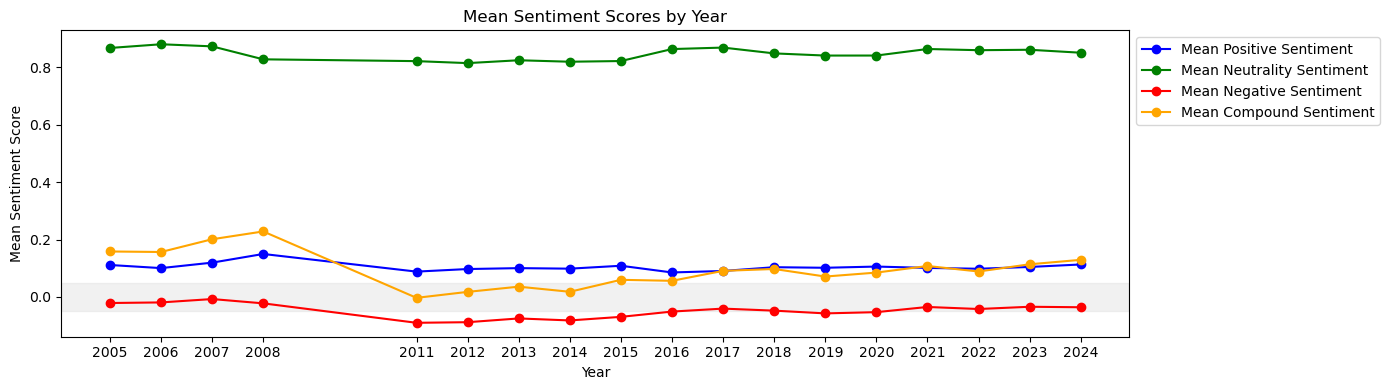

In [8]:
# Create a Figure and an Axes object with larger size
fig, ax = plt.subplots(figsize=(14,4))

# Plot mean positivity
ax.plot(mean_positivity_year['year'], mean_positivity_year['positivity_text'], marker='o', linestyle='-', color='blue', label='Mean Positive Sentiment')

# Plot mean neutrality
ax.plot(mean_neutrality_year['year'], mean_neutrality_year['neutrality_text'], marker='o', linestyle='-', color='green', label='Mean Neutrality Sentiment')

# Plot mean negativity (display as negative values)
ax.plot(mean_negativity_year['year'], -mean_negativity_year['negativity_text'], marker='o', linestyle='-', color='red', label='Mean Negative Sentiment')

# Plot mean compound
ax.plot(mean_compound_year['year'], mean_compound_year['compound_text'], marker='o', linestyle='-', color='orange', label='Mean Compound Sentiment')

# Add a legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add a light grey shaded area from -0.05 to +0.05 on the y-axis
ax.axhspan(-0.05, 0.05, color='lightgrey', alpha=0.3)

# Labeling and titling
ax.set_xlabel('Year')
ax.set_ylabel('Mean Sentiment Score')
ax.set_title('Mean Sentiment Scores by Year')

# Set x-axis ticks to display every year
ax.set_xticks(mean_positivity_year['year'])

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


In [14]:
# summary statistics for the yearly positivity
df_compound_year_latex = df.drop(columns=['stock', 'date', 'title', 'source', 'link_source', 'month','neutrality_text', 
                 'negativity_text', 'positivity_text' ]).groupby('year').describe()

# print LaTeX
print(df_compound_year_latex.to_latex(
                  formatters={"name": str.upper},
                  float_format="{:.3f}".format,))

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{compound_text} \\
 & count & mean & std & min & 25% & 50% & 75% & max \\
year &  &  &  &  &  &  &  &  \\
\midrule
2005 & 177.000 & 0.158 & 0.298 & -0.625 & 0.000 & 0.000 & 0.402 & 0.863 \\
2006 & 139.000 & 0.157 & 0.300 & -0.670 & 0.000 & 0.000 & 0.392 & 0.908 \\
2007 & 113.000 & 0.201 & 0.304 & -0.649 & 0.000 & 0.000 & 0.459 & 0.836 \\
2008 & 57.000 & 0.228 & 0.370 & -0.832 & 0.000 & 0.000 & 0.511 & 0.888 \\
2011 & 502.000 & -0.003 & 0.288 & -0.751 & -0.128 & 0.000 & 0.114 & 0.832 \\
2012 & 766.000 & 0.018 & 0.304 & -0.836 & -0.103 & 0.000 & 0.178 & 0.872 \\
2013 & 3288.000 & 0.036 & 0.305 & -0.859 & -0.030 & 0.000 & 0.210 & 0.906 \\
2014 & 2882.000 & 0.018 & 0.312 & -0.859 & -0.103 & 0.000 & 0.178 & 0.869 \\
2015 & 2321.000 & 0.060 & 0.307 & -0.827 & 0.000 & 0.000 & 0.273 & 0.912 \\
2016 & 10026.000 & 0.056 & 0.296 & -0.886 & 0.000 & 0.000 & 0.250 & 0.902 \\
2017 & 67248.000 & 0.091 & 0.312 & -0.927 & 0.000 & 0.000 & 0.317 & 0

In [15]:
df_compound_year_latex

compound_text                                                       \
             count      mean       std     min       25%  50%       75%   
year                                                                      
2005         177.0  0.158494  0.297763 -0.6249  0.000000  0.0  0.401900   
2006         139.0  0.156699  0.299973 -0.6705  0.000000  0.0  0.391850   
2007         113.0  0.201119  0.303832 -0.6486  0.000000  0.0  0.458800   
2008          57.0  0.228288  0.369546 -0.8316  0.000000  0.0  0.510600   
2011         502.0 -0.003037  0.287773 -0.7506 -0.128000  0.0  0.114325   
2012         766.0  0.017730  0.304440 -0.8360 -0.102700  0.0  0.177900   
2013        3288.0  0.035894  0.304584 -0.8591 -0.030125  0.0  0.210150   
2014        2882.0  0.018062  0.311842 -0.8591 -0.102700  0.0  0.177900   
2015        2321.0  0.059735  0.306745 -0.8271  0.000000  0.0  0.273200   
2016       10026.0  0.056271  0.296080 -0.8860  0.000000  0.0  0.250000   
2017       67248.0  0.090977  0.312350 -0.9274  0.000000  0.0  0.317075   
2018       38970.0  0.097498  0.326862 -0.9538  0.000000  0.0  0.318200   
2019       52557.0  0.071139  0.324891 -0.9287  0.000000  0.0  0.296000   
2020       69851.0  0.084950  0.316356 -0.9382  0.000000  0.0  0.296000   
2021       78792.0  0.107890  0.292068 -0.9349  0.000000  0.0  0.296000   
2022       91271.0  0.088713  0.296090 -0.9118  0.000000  0.0  0.273200   
2023      112009.0  0.113888  0.294261 -0.9578  0.000000  0.0  0.296000   
2024       50738.0  0.129376  0.311515 -0.9300  0.000000  0.0  0.340000   

              
         max  
year          
2005  0.8625  
2006  0.9081  
2007  0.8360  
2008  0.8885  
2011  0.8316  
2012  0.8720  
2013  0.9062  
2014  0.8689  
2015  0.9118  
2016  0.9022  
2017  0.9781  
2018  0.9753  
2019  0.9313  
2020  0.9501  
2021  0.9670  
2022  0.9607  
2023  0.9636  
2024  0.9609

In [11]:
# summary statistics for the yearly neutrality
df_neutrality_year_latex = df.drop(columns=['stock', 'date', 'title', 'source', 'link_source', 'month','positivity_text',
                 'negativity_text', 'compound_text' ]).groupby('year').describe()
# print LaTeX
print(df_neutrality_year_latex.to_latex(
                  formatters={"name": str.upper},
                  float_format="{:.1f}".format,))

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{neutrality_text} \\
 & count & mean & std & min & 25% & 50% & 75% & max \\
year &  &  &  &  &  &  &  &  \\
\midrule
2005 & 177.0 & 0.9 & 0.2 & 0.3 & 0.7 & 1.0 & 1.0 & 1.0 \\
2006 & 139.0 & 0.9 & 0.1 & 0.5 & 0.8 & 1.0 & 1.0 & 1.0 \\
2007 & 113.0 & 0.9 & 0.2 & 0.5 & 0.8 & 1.0 & 1.0 & 1.0 \\
2008 & 57.0 & 0.8 & 0.2 & 0.3 & 0.7 & 0.8 & 1.0 & 1.0 \\
2011 & 502.0 & 0.8 & 0.2 & 0.3 & 0.7 & 0.8 & 1.0 & 1.0 \\
2012 & 766.0 & 0.8 & 0.2 & 0.3 & 0.7 & 0.8 & 1.0 & 1.0 \\
2013 & 3288.0 & 0.8 & 0.2 & 0.2 & 0.7 & 0.8 & 1.0 & 1.0 \\
2014 & 2882.0 & 0.8 & 0.2 & 0.2 & 0.7 & 0.8 & 1.0 & 1.0 \\
2015 & 2321.0 & 0.8 & 0.2 & 0.2 & 0.7 & 0.8 & 1.0 & 1.0 \\
2016 & 10026.0 & 0.9 & 0.1 & 0.2 & 0.8 & 0.9 & 1.0 & 1.0 \\
2017 & 67248.0 & 0.9 & 0.1 & 0.2 & 0.8 & 0.9 & 1.0 & 1.0 \\
2018 & 38970.0 & 0.8 & 0.2 & 0.2 & 0.7 & 0.9 & 1.0 & 1.0 \\
2019 & 52557.0 & 0.8 & 0.2 & 0.2 & 0.7 & 0.8 & 1.0 & 1.0 \\
2020 & 69851.0 & 0.8 & 0.2 & 0.2 & 0.7 & 0.8 & 1.0 & 1.0 \\
20

In [19]:
# summary statistics for the yearly negativity
df_negativity_year_latex = df.drop(columns=['stock', 'date', 'title', 'source', 'link_source', 
                                            'month','positivity_text','neutrality_text', 'compound_text'
                                           ]).groupby('year').describe()
# print LaTeX
print(df_negativity_year_latex.to_latex(
                  formatters={"name": str.upper},
                  float_format="{:.5f}".format,))

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{negativity_text} \\
 & count & mean & std & min & 25% & 50% & 75% & max \\
year &  &  &  &  &  &  &  &  \\
\midrule
2005 & 177.00000 & 0.02106 & 0.06725 & 0.00000 & 0.00000 & 0.00000 & 0.00000 & 0.35100 \\
2006 & 139.00000 & 0.01899 & 0.06607 & 0.00000 & 0.00000 & 0.00000 & 0.00000 & 0.38800 \\
2007 & 113.00000 & 0.00726 & 0.04053 & 0.00000 & 0.00000 & 0.00000 & 0.00000 & 0.29000 \\
2008 & 57.00000 & 0.02226 & 0.07232 & 0.00000 & 0.00000 & 0.00000 & 0.00000 & 0.33300 \\
2011 & 502.00000 & 0.08999 & 0.13788 & 0.00000 & 0.00000 & 0.00000 & 0.20800 & 0.54100 \\
2012 & 766.00000 & 0.08792 & 0.13902 & 0.00000 & 0.00000 & 0.00000 & 0.19600 & 0.61000 \\
2013 & 3288.00000 & 0.07480 & 0.12549 & 0.00000 & 0.00000 & 0.00000 & 0.16325 & 0.65700 \\
2014 & 2882.00000 & 0.08178 & 0.13044 & 0.00000 & 0.00000 & 0.00000 & 0.17475 & 0.58900 \\
2015 & 2321.00000 & 0.06928 & 0.12019 & 0.00000 & 0.00000 & 0.00000 & 0.14400 & 0.63500 \\
2016 & 10026.0

# Sentimental for each month

In [13]:
# compute the means for each month
mean_positivity_month = df.groupby('month')['positivity_text'].mean().reset_index()
mean_neutrality_month = df.groupby('month')['neutrality_text'].mean().reset_index()
mean_negativity_month = df.groupby('month')['negativity_text'].mean().reset_index()
mean_compound_month = df.groupby('month')['compound_text'].mean().reset_index()

In [14]:
# compute mean for every month
mean_positivity_month

month  positivity_text
0       1         0.108046
1       2         0.100159
2       3         0.100960
3       4         0.098339
4       5         0.096676
5       6         0.102971
6       7         0.099946
7       8         0.100147
8       9         0.103662
9      10         0.102274
10     11         0.102395
11     12         0.108453

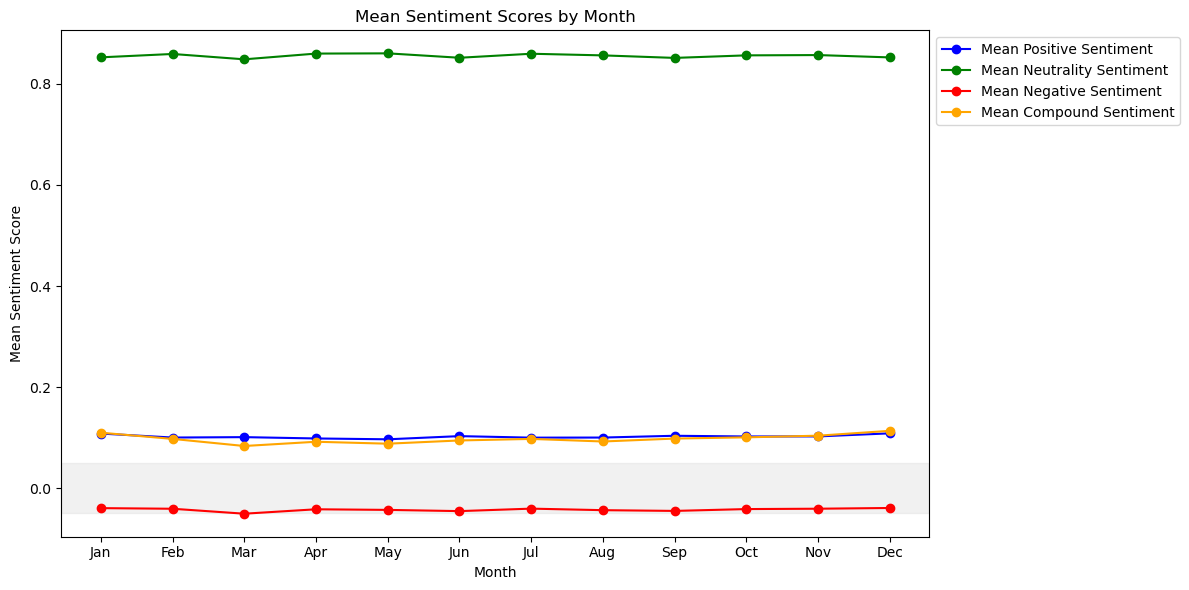

In [15]:
# Create a Figure and an Axes object with larger size
fig, ax = plt.subplots(figsize=(12, 6))

# Plot mean positivity
ax.plot(mean_positivity_month['month'], mean_positivity_month['positivity_text'], marker='o', linestyle='-', color='blue', label='Mean Positive Sentiment')

# Plot mean neutrality
ax.plot(mean_neutrality_month['month'], mean_neutrality_month['neutrality_text'], marker='o', linestyle='-', color='green', label='Mean Neutrality Sentiment')

# Plot mean negativity (display as negative values)
ax.plot(mean_negativity_month['month'], -mean_negativity_month['negativity_text'], marker='o', linestyle='-', color='red', label='Mean Negative Sentiment')

# Plot mean compound
ax.plot(mean_compound_month['month'], mean_compound_month['compound_text'], marker='o', linestyle='-', color='orange', label='Mean Compound Sentiment')

# Add a legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# light grey shaded area from -0.05 to +0.05 on the y-axis
ax.axhspan(-0.05, 0.05, color='lightgrey', alpha=0.3)

# Labeling and titling
ax.set_xlabel('Month')
ax.set_ylabel('Mean Sentiment Score')
ax.set_title('Mean Sentiment Scores by Month')

# Set x-axis ticks to display every month
ax.set_xticks(mean_positivity_month['month'])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [16]:
# summary statistics for the monthly positivity
df_positivity_month_latex = df.drop(columns=['stock', 'date', 'title', 'source', 'link_source', 
                                            'year','negativity_text','neutrality_text', 'compound_text'
                                           ]).groupby('month').describe()
# print LaTeX
print(df_positivity_month_latex.to_latex(
                  formatters={"name": str.upper},
                  float_format="{:.1f}".format,))

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{positivity_text} \\
 & count & mean & std & min & 25% & 50% & 75% & max \\
month &  &  &  &  &  &  &  &  \\
\midrule
1 & 49826.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
2 & 53596.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
3 & 51201.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
4 & 63913.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
5 & 52063.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
6 & 44105.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
7 & 48585.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
8 & 42119.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
9 & 37643.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.7 \\
10 & 55372.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
11 & 44777.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
12 & 38507.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\
\bottomrule
\end{tabular}



In [17]:
# summary statistics for the monthly neutrality
df_neutrality_month_latex = df.drop(columns=['stock', 'date', 'title', 'source', 'link_source', 
                                            'year','negativity_text','positivity_text', 'compound_text'
                                           ]).groupby('month').describe()
# print LaTeX
print(df_neutrality_month_latex.to_latex(
                  formatters={"name": str.upper},
                  float_format="{:.1f}".format,))

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{neutrality_text} \\
 & count & mean & std & min & 25% & 50% & 75% & max \\
month &  &  &  &  &  &  &  &  \\
\midrule
1 & 49826.0 & 0.9 & 0.2 & 0.2 & 0.7 & 0.9 & 1.0 & 1.0 \\
2 & 53596.0 & 0.9 & 0.2 & 0.2 & 0.7 & 0.9 & 1.0 & 1.0 \\
3 & 51201.0 & 0.8 & 0.2 & 0.2 & 0.7 & 0.9 & 1.0 & 1.0 \\
4 & 63913.0 & 0.9 & 0.2 & 0.2 & 0.8 & 0.9 & 1.0 & 1.0 \\
5 & 52063.0 & 0.9 & 0.2 & 0.2 & 0.8 & 0.9 & 1.0 & 1.0 \\
6 & 44105.0 & 0.9 & 0.2 & 0.2 & 0.7 & 0.9 & 1.0 & 1.0 \\
7 & 48585.0 & 0.9 & 0.2 & 0.2 & 0.8 & 0.9 & 1.0 & 1.0 \\
8 & 42119.0 & 0.9 & 0.2 & 0.2 & 0.7 & 0.9 & 1.0 & 1.0 \\
9 & 37643.0 & 0.9 & 0.2 & 0.2 & 0.7 & 0.9 & 1.0 & 1.0 \\
10 & 55372.0 & 0.9 & 0.2 & 0.2 & 0.7 & 0.9 & 1.0 & 1.0 \\
11 & 44777.0 & 0.9 & 0.2 & 0.2 & 0.7 & 0.9 & 1.0 & 1.0 \\
12 & 38507.0 & 0.9 & 0.2 & 0.2 & 0.7 & 0.9 & 1.0 & 1.0 \\
\bottomrule
\end{tabular}



In [18]:
# summary statistics for the monthly negativity
df_negativity_month_latex = df.drop(columns=['stock', 'date', 'title', 'source', 'link_source', 
                                            'year','positivity_text','neutrality_text', 'compound_text'
                                           ]).groupby('month').describe()
# print LaTeX
print(df_negativity_month_latex.to_latex(
                  formatters={"name": str.upper},
                  float_format="{:.1f}".format,))

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{negativity_text} \\
 & count & mean & std & min & 25% & 50% & 75% & max \\
month &  &  &  &  &  &  &  &  \\
\midrule
1 & 49826.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
2 & 53596.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
3 & 51201.0 & 0.1 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
4 & 63913.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
5 & 52063.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.6 \\
6 & 44105.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
7 & 48585.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
8 & 42119.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
9 & 37643.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
10 & 55372.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
11 & 44777.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
12 & 38507.0 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.7 \\
\bottomrule
\end{tabular}



# Sentimental top15 SP500: each month

Compute the means of the sentiment analysis for each month for every stock

In [19]:
# Group by 'stock', 'year', and 'month' and calculate the mean for each sentiment score
mean_sentiment_month = df.groupby(['ticker', 'year', 'month']).agg({
    'positivity_text': 'mean',
    'neutrality_text': 'mean',
    'negativity_text': 'mean',
    'compound_text': 'mean'
}).reset_index()

# print
mean_sentiment_month.head()

ticker  year  month  positivity_text  neutrality_text  negativity_text  \
0      a  2007     10           0.1110           0.8890              0.0   
1      a  2016      9           0.2620           0.7380              0.0   
2      a  2016     11           0.0900           0.9100              0.0   
3      a  2017      2           0.1235           0.8765              0.0   
4      a  2017      3           0.1306           0.8694              0.0   

   compound_text  
0         0.2500  
1         0.4939  
2         0.1480  
3         0.1591  
4         0.2584

In [21]:
# List of columns to plot
stocks_and_sp500 = ['amzn', 'aapl', 'avgo', 'brk', 'goog', 'googl', 'jpm', 'lly', 'meta', 'msft', 'nvda', 'tsla', 'unh', 'v', 'xom']

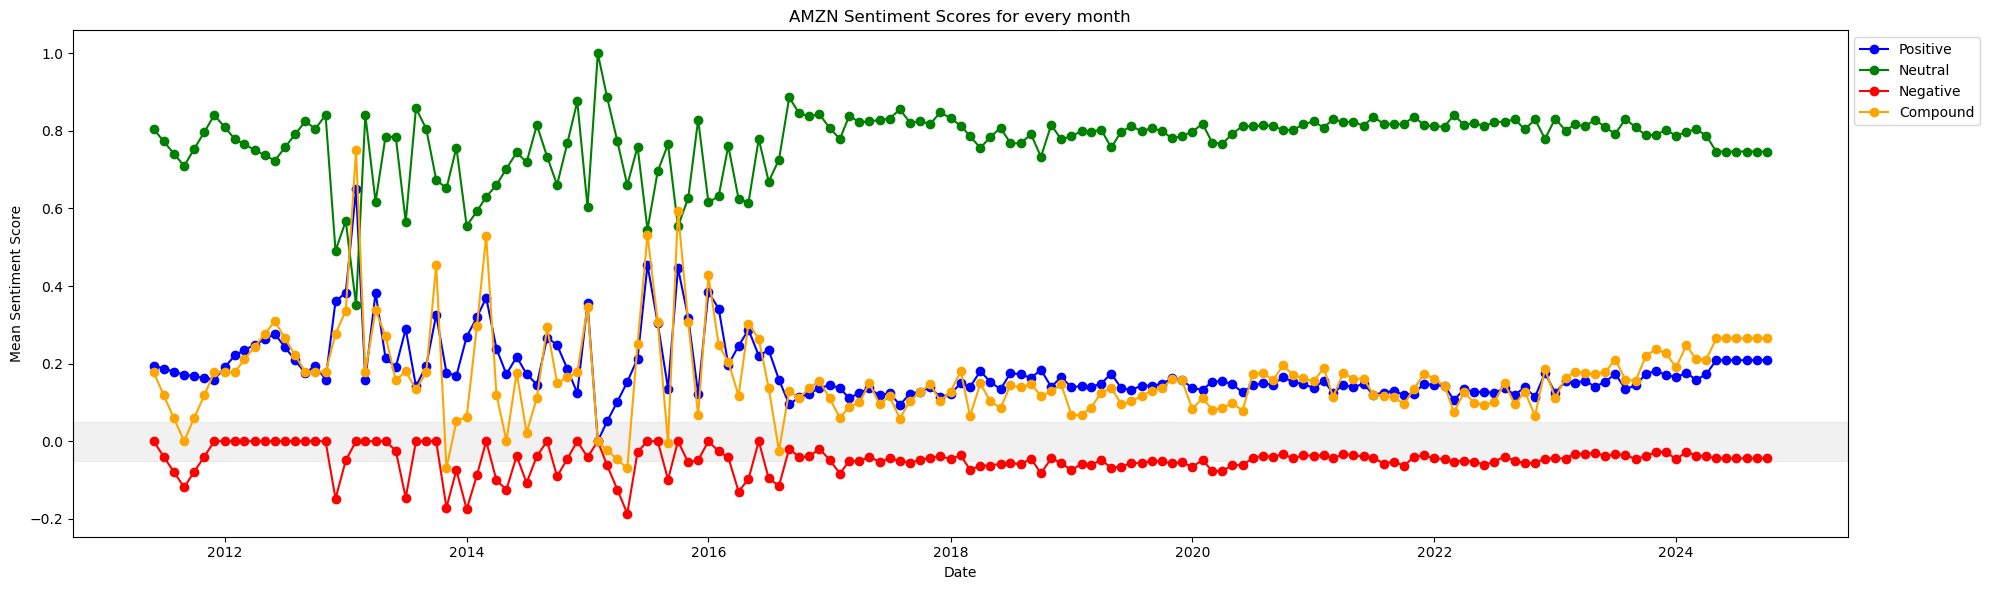

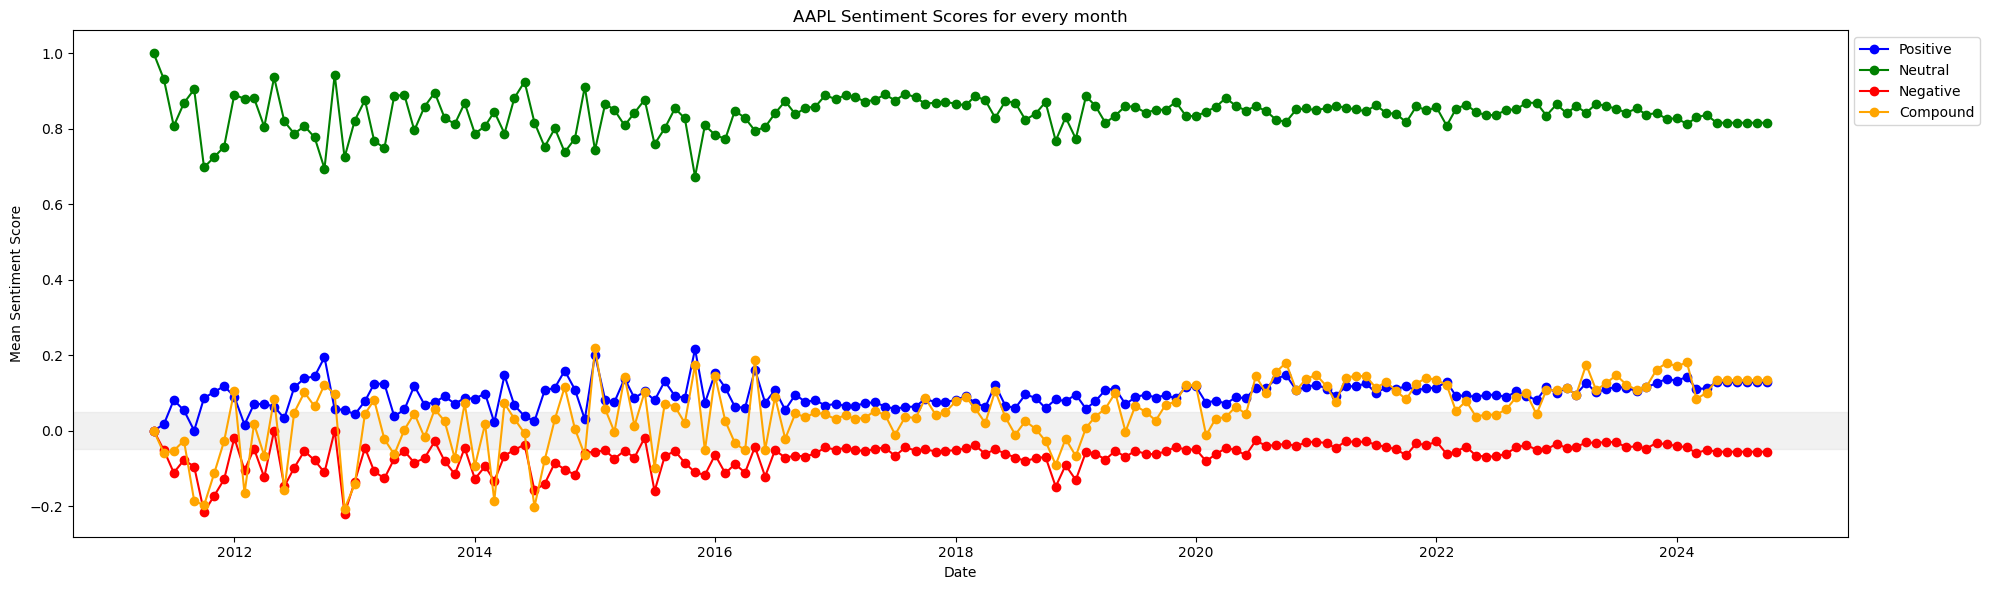

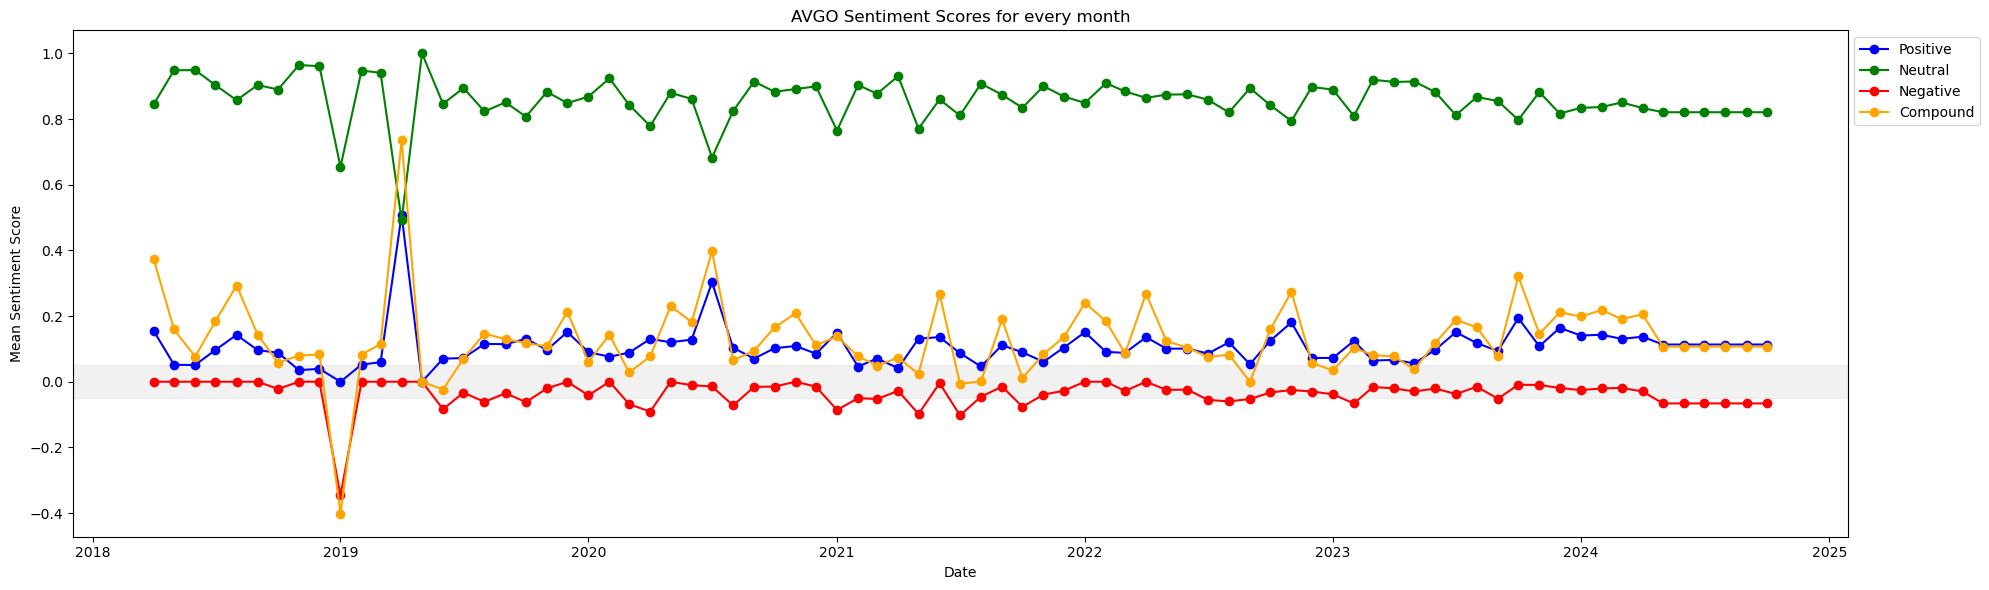

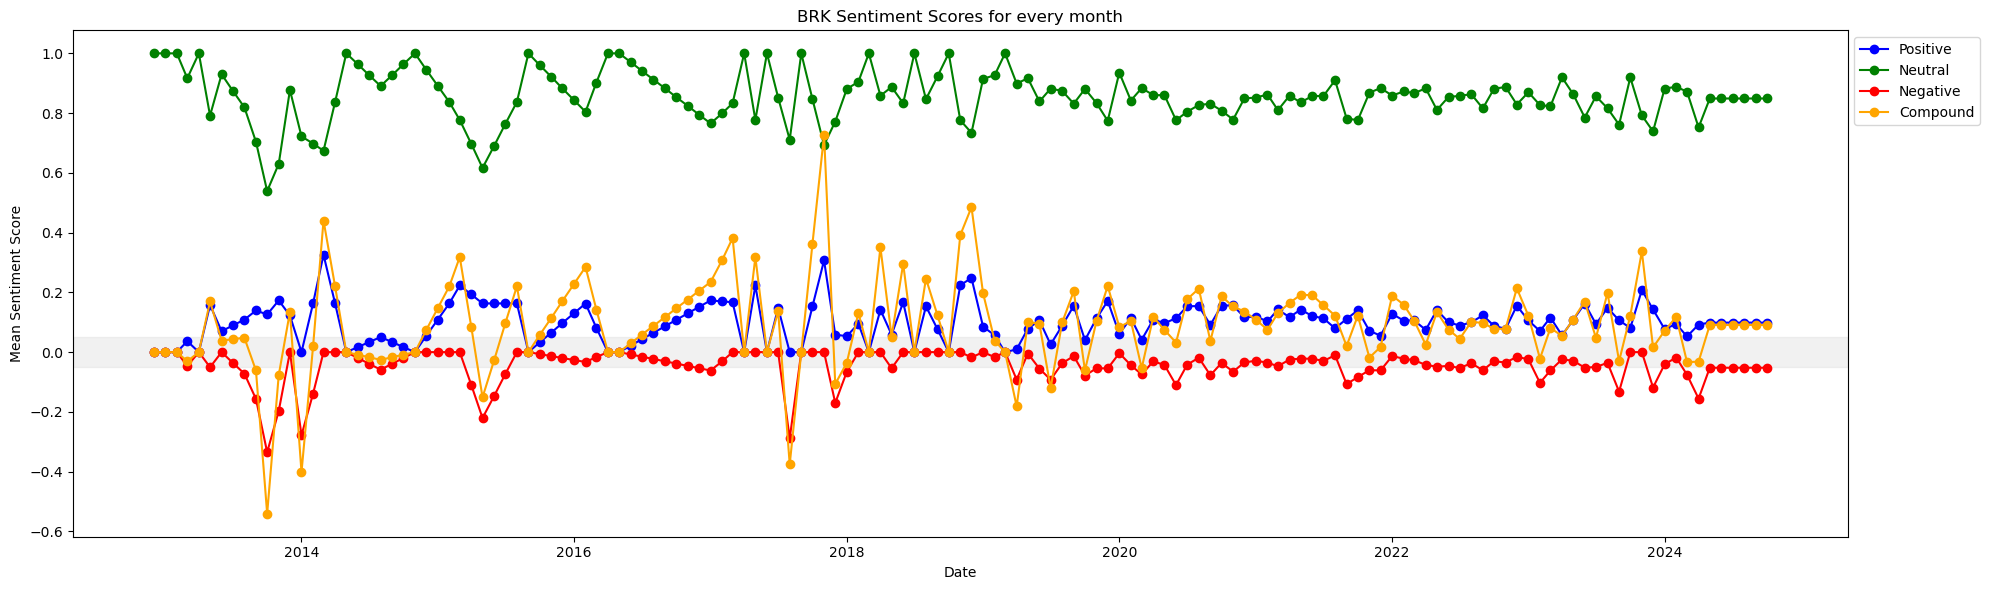

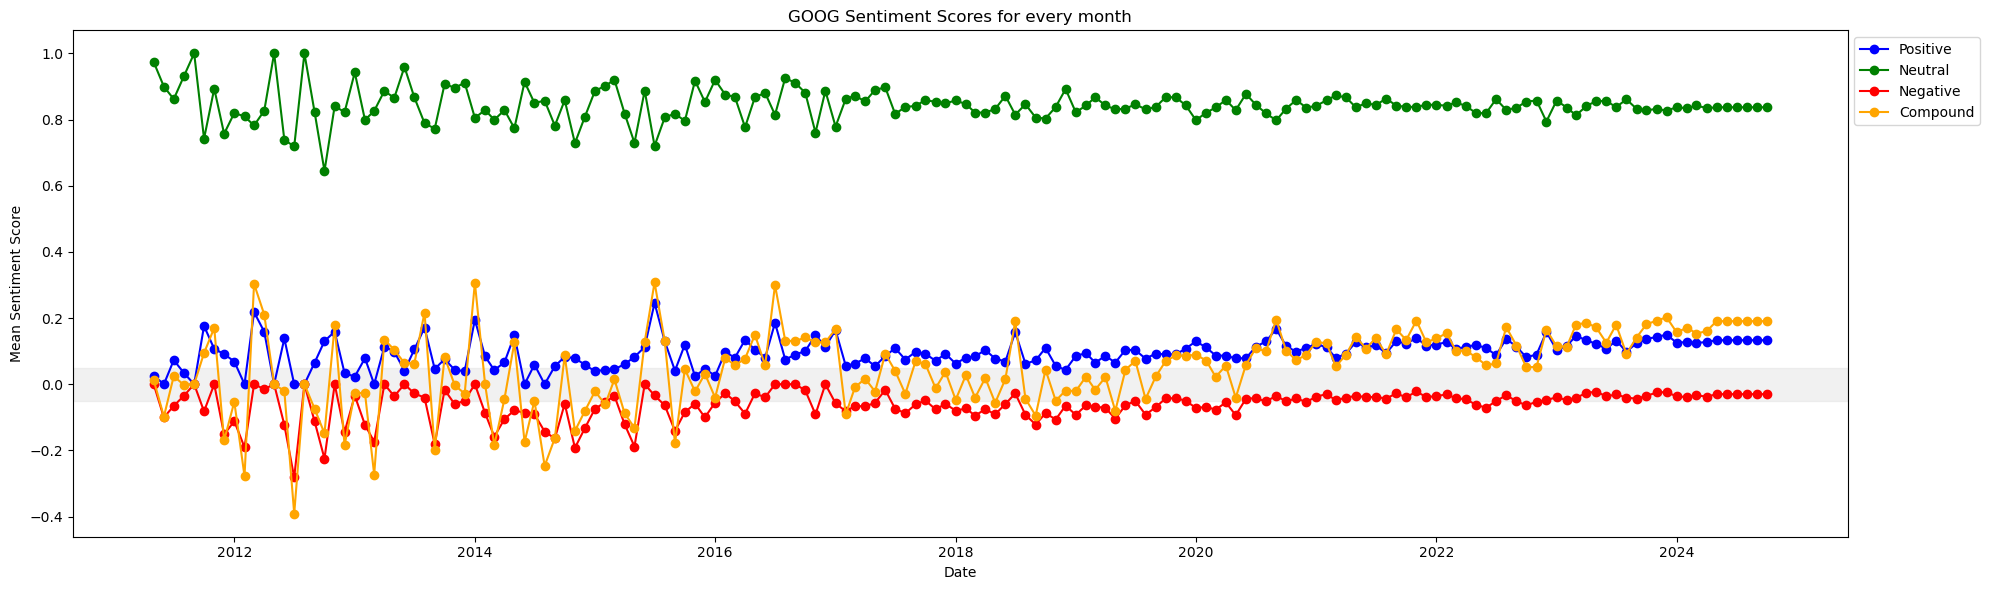

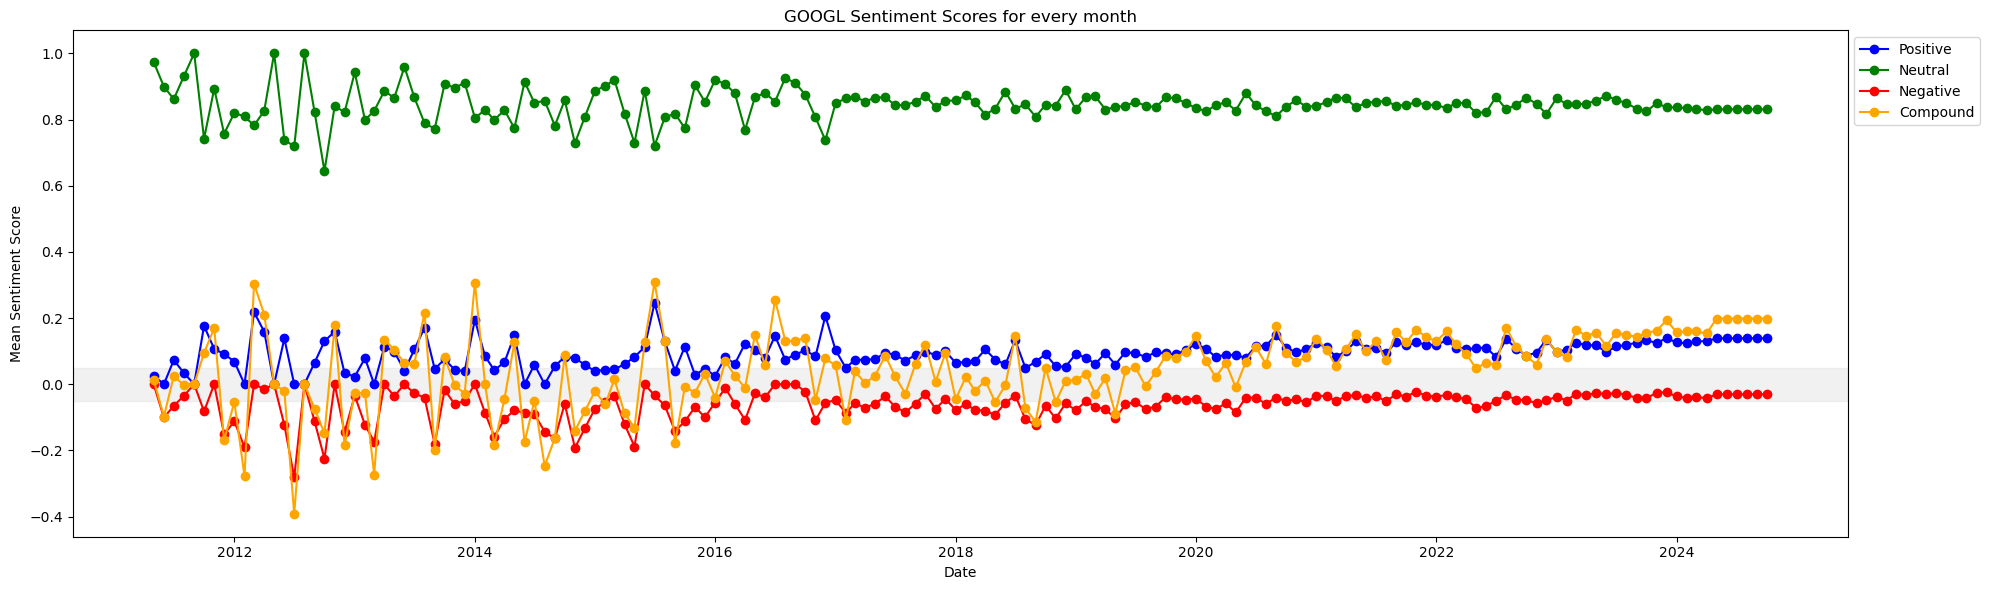

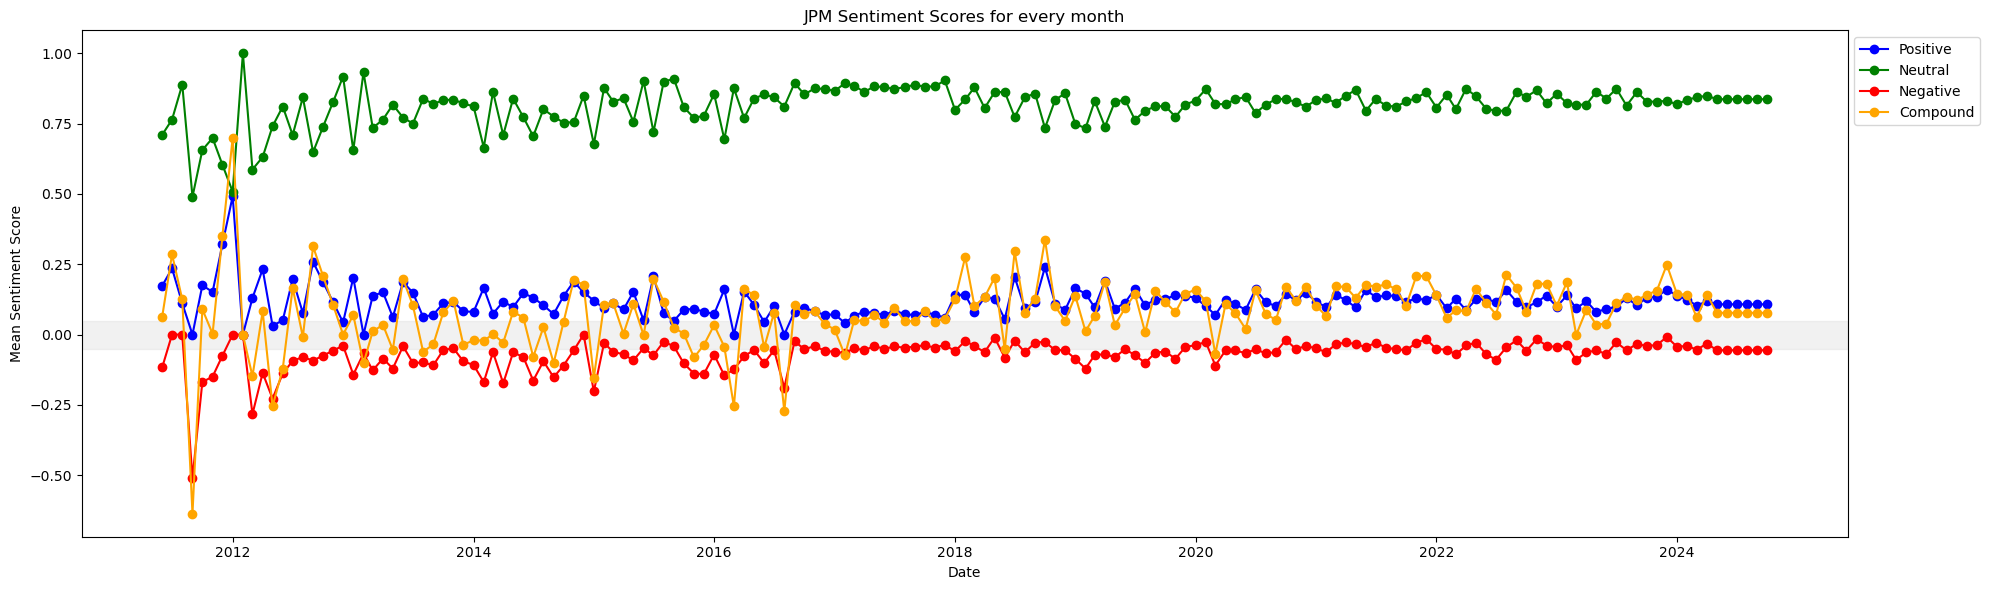

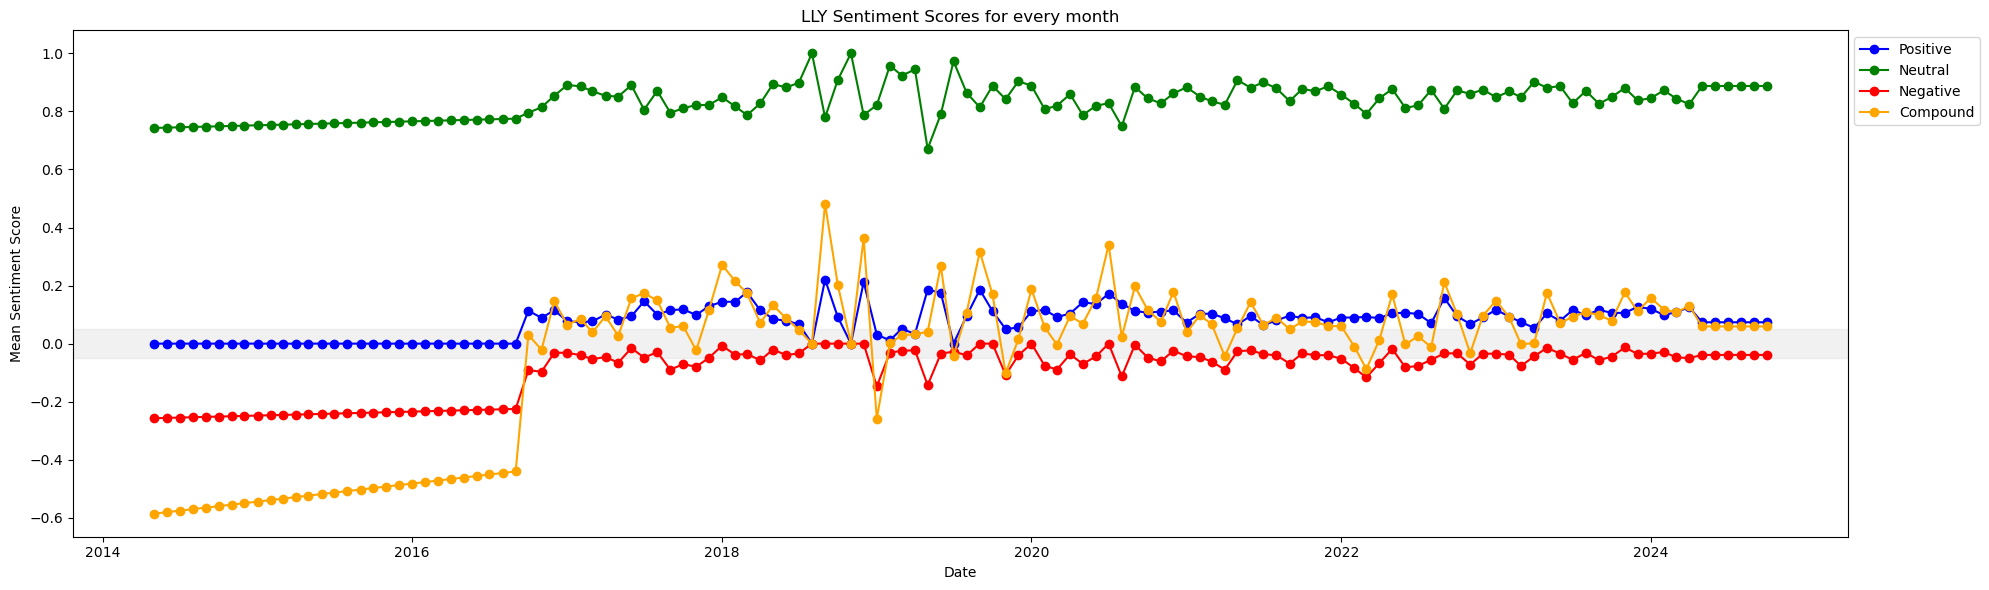

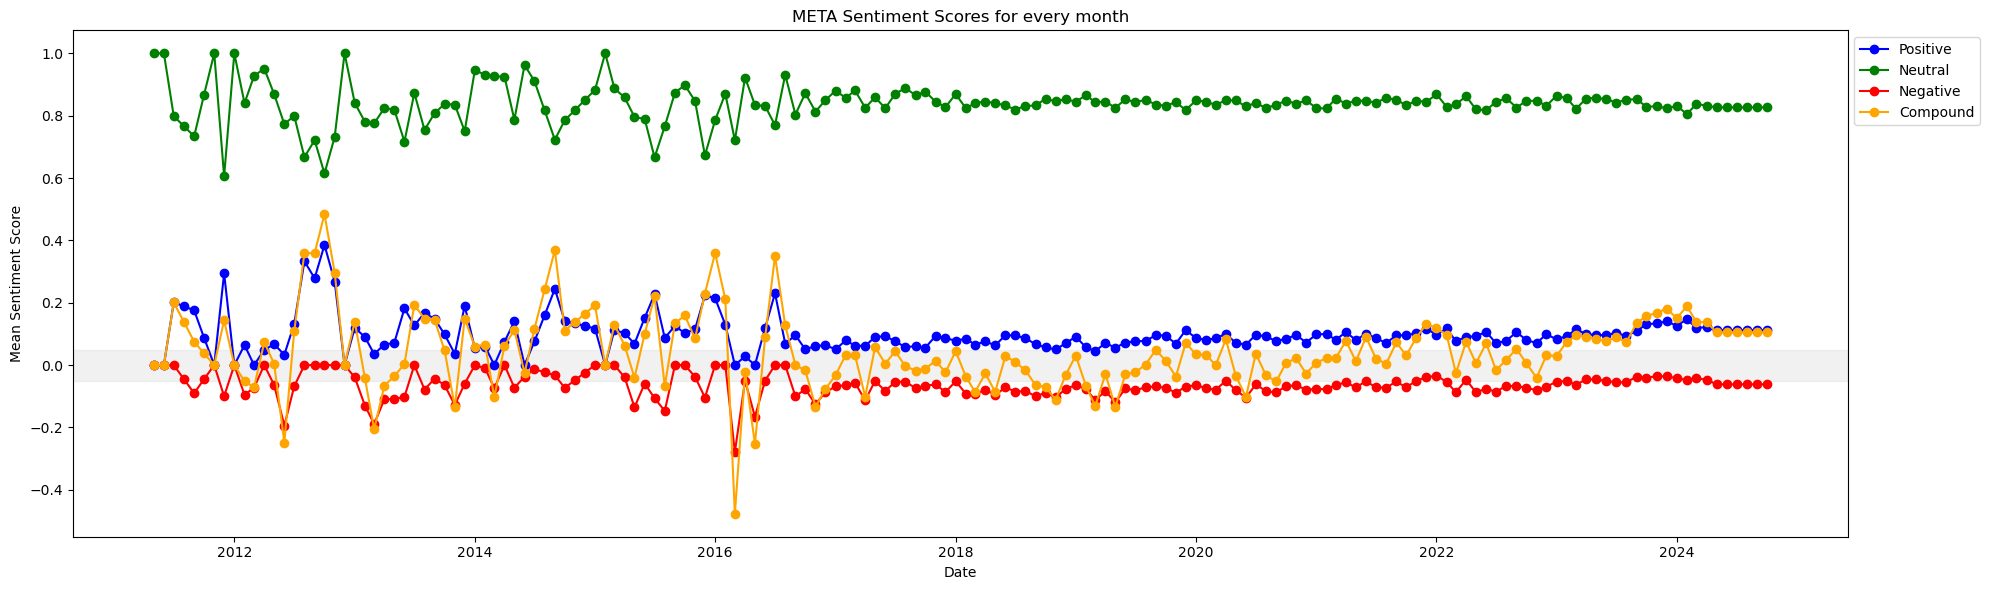

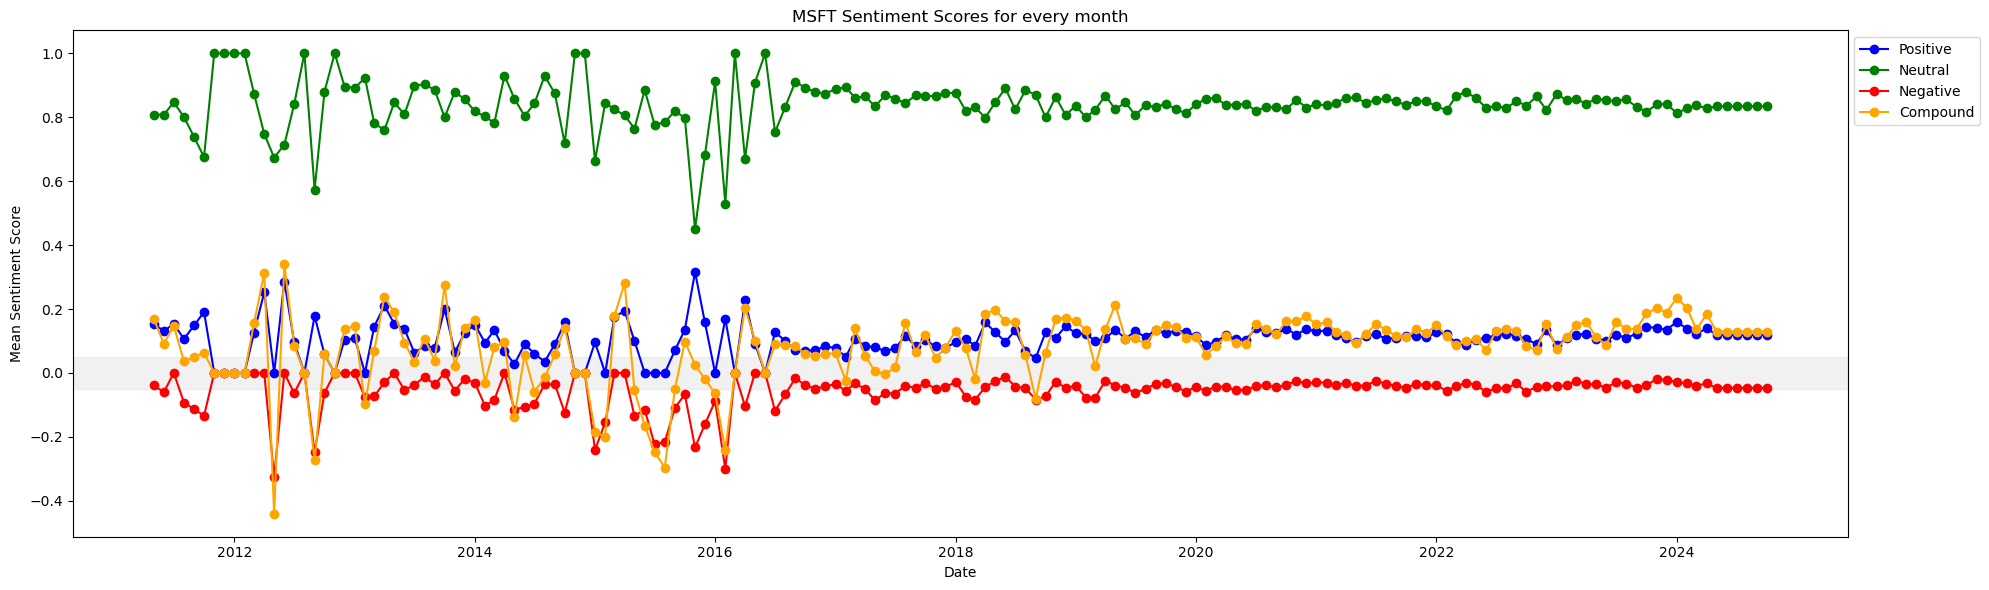

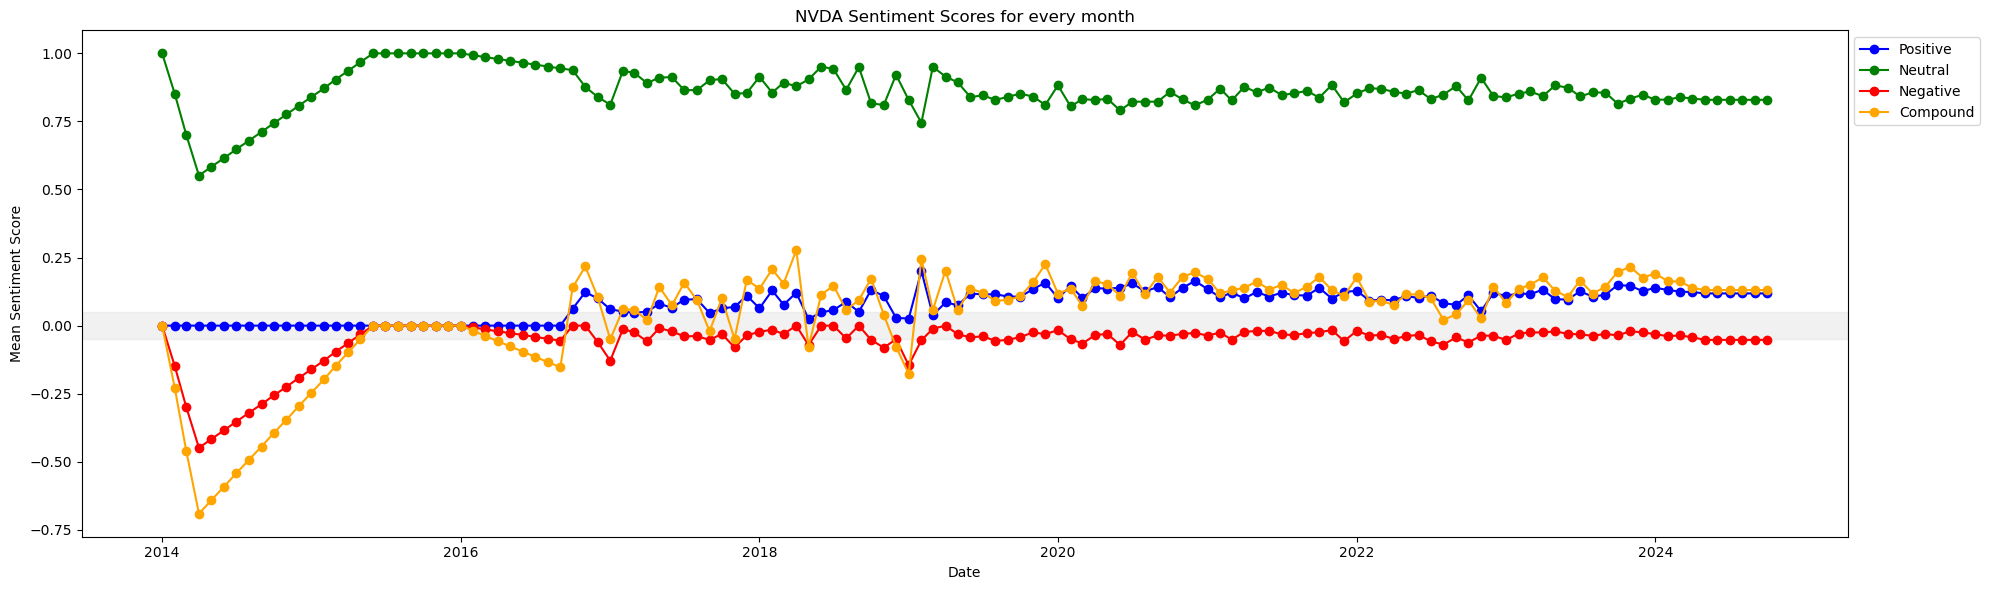

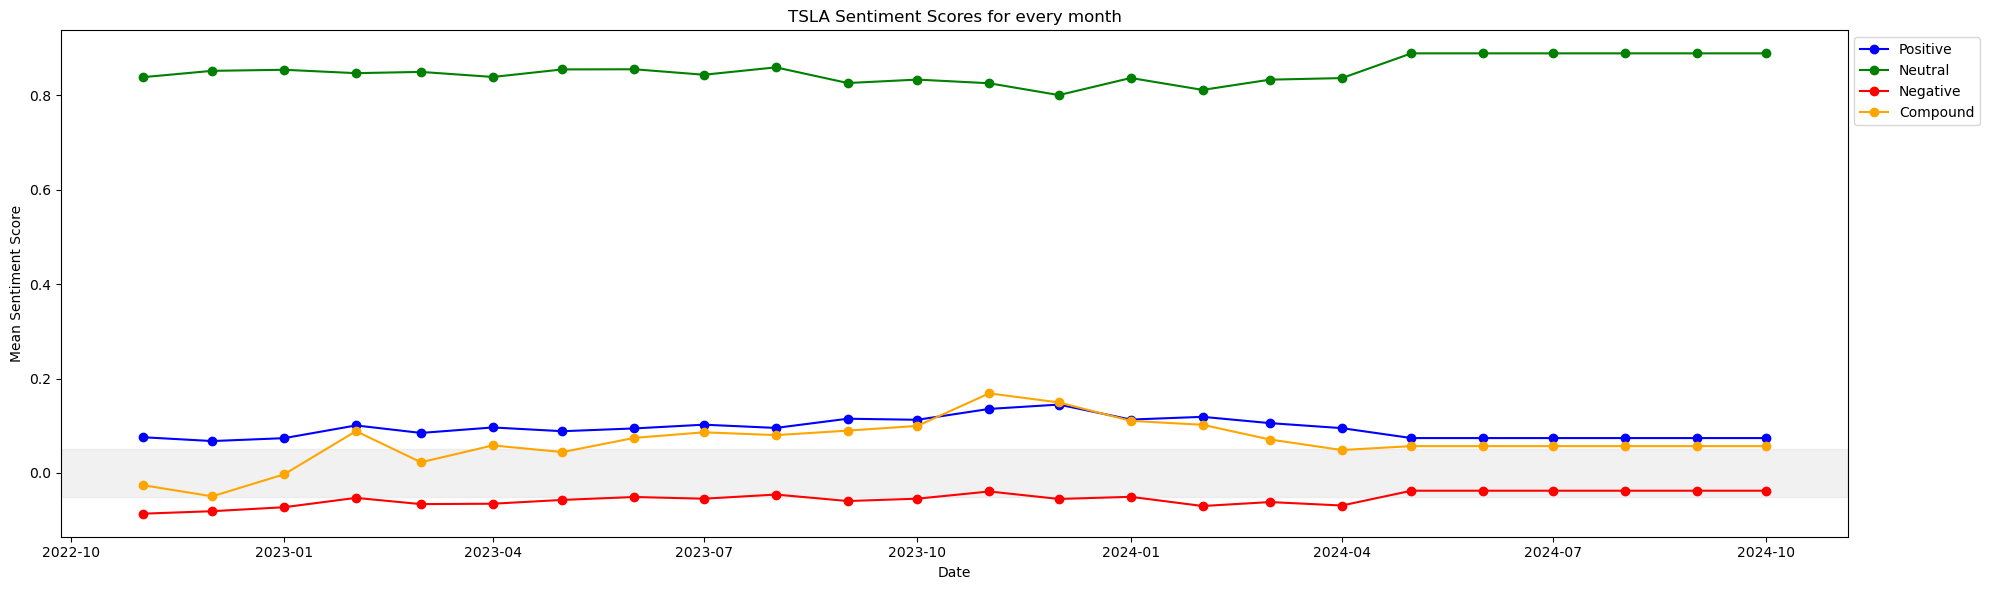

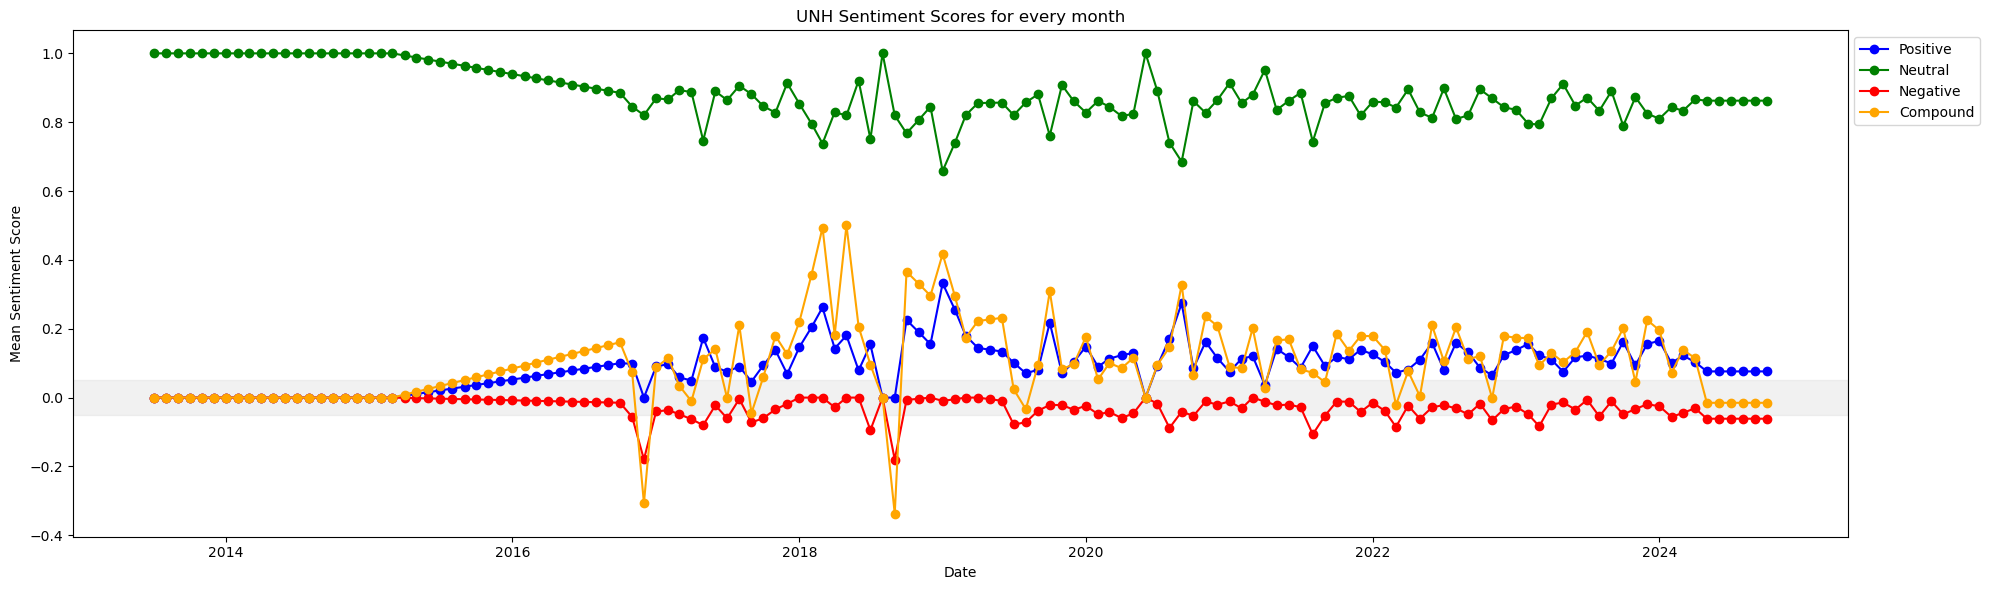

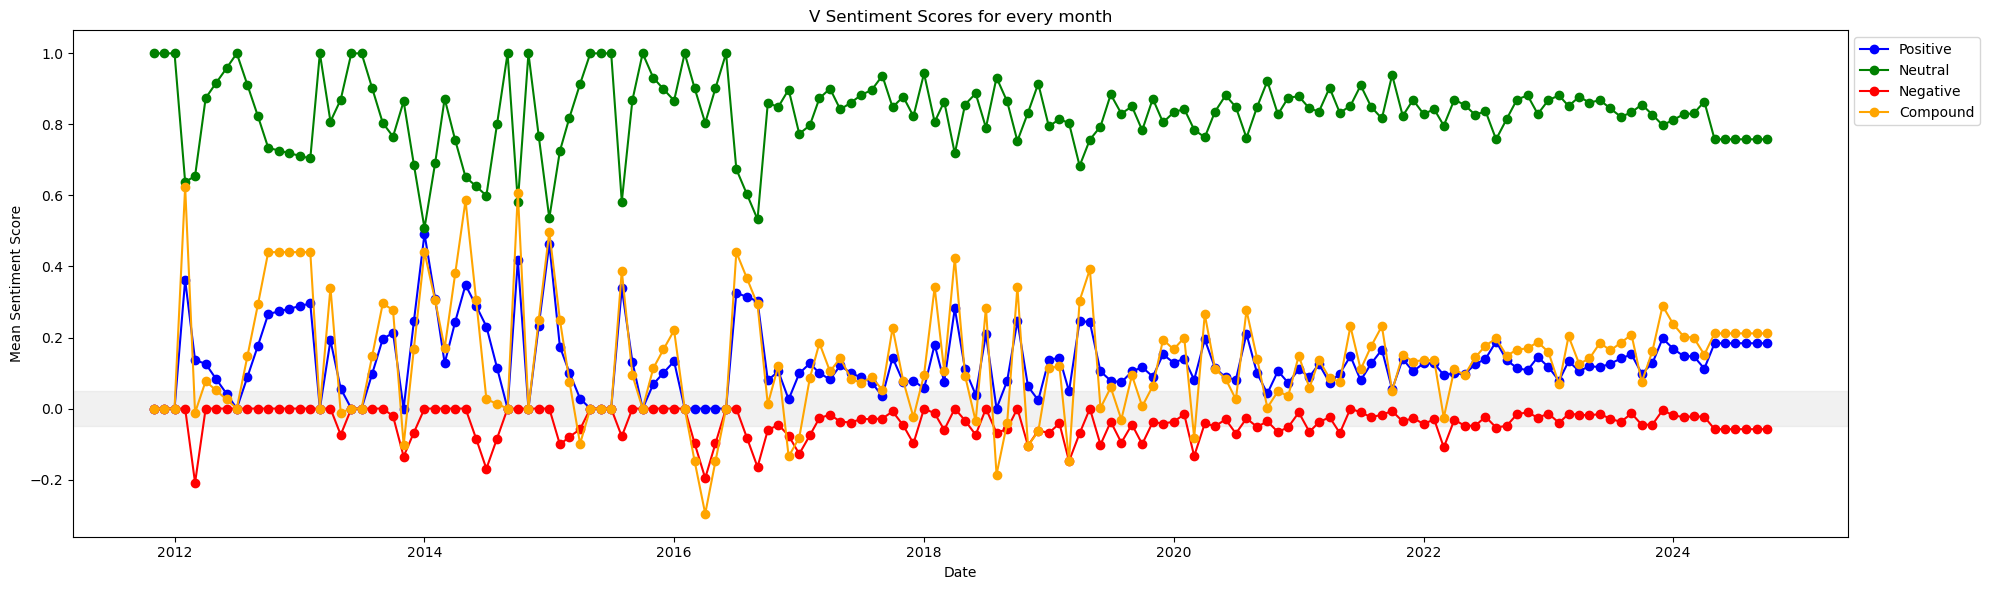

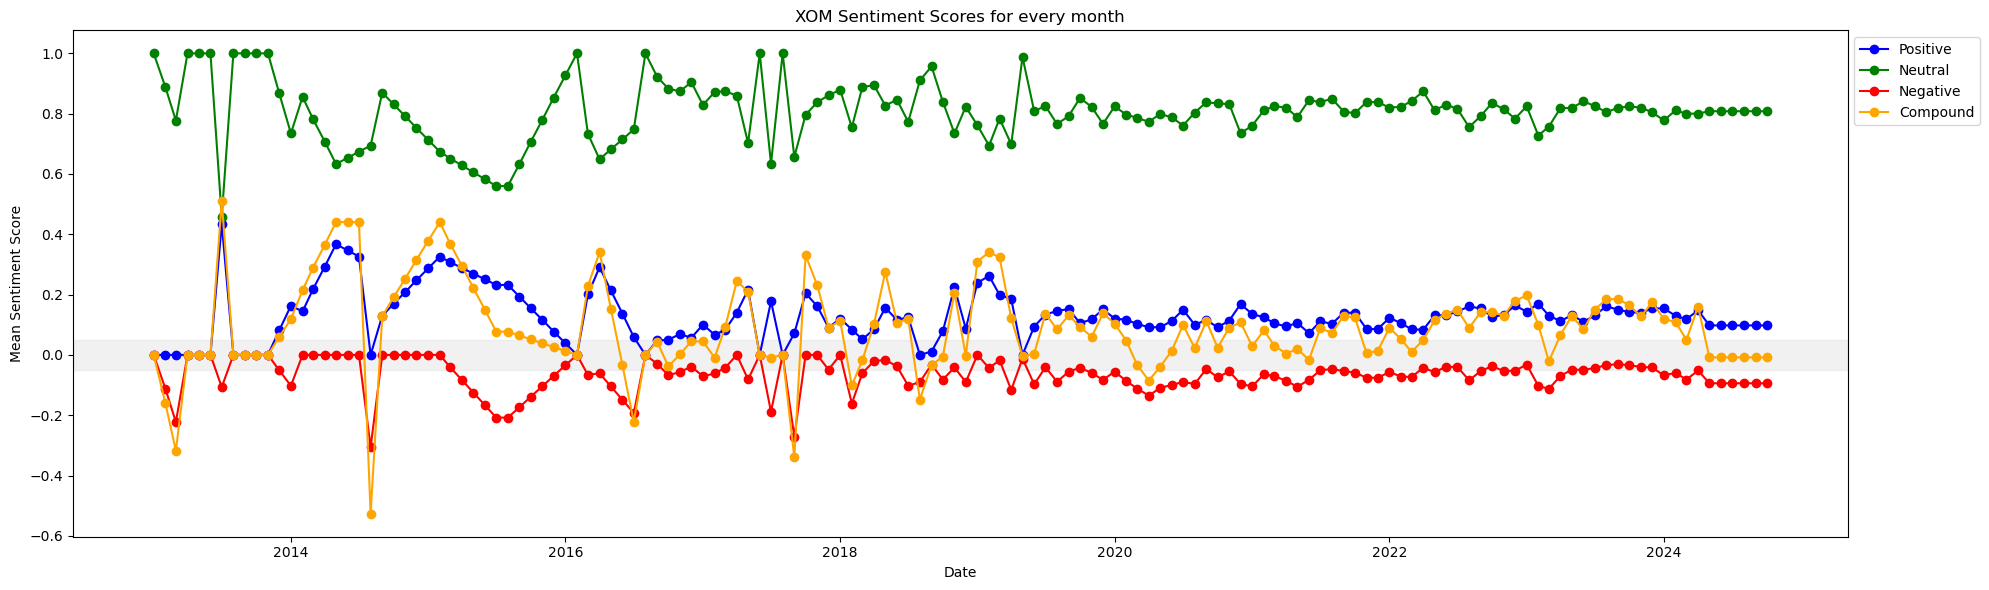

In [22]:
# Filter the DataFrame to include data from January 2010 to 2024
mean_sentiment_month_filtered = mean_sentiment_month[(mean_sentiment_month['year'] >= 2010) & (mean_sentiment_month['year'] <= 2024)]

# Create a figure for each stock ticker
for ticker in stocks_and_sp500:
    # Filter the DataFrame for the current ticker
    stock_data = mean_sentiment_month_filtered[mean_sentiment_month_filtered['ticker'].str.lower() == ticker].copy()
    
    # Create a complete date range from January 2010 to January 2024
    date_range = pd.date_range(start='2010-01-01', end='2024-10-01', freq='MS')
    
    # Convert the 'year' and 'month' columns to datetime format
    stock_data['date'] = pd.to_datetime(stock_data['year'].astype(str) + '-' + stock_data['month'].astype(str).str.zfill(2))
    
    # Merge with the complete date range to fill missing months
    stock_data = pd.merge(stock_data, pd.DataFrame(date_range, columns=['date']), how='right', on='date')
    
    # Sort by date
    stock_data = stock_data.sort_values('date')
    
    # Interpolate missing values
    stock_data['positivity_text'].interpolate(inplace=True)
    stock_data['neutrality_text'].interpolate(inplace=True)
    stock_data['negativity_text'].interpolate(inplace=True)
    stock_data['compound_text'].interpolate(inplace=True)
    
    # Create a new figure
    plt.figure(figsize=(20, 6))
    
    # Plot mean positivity
    plt.plot(stock_data['date'], stock_data['positivity_text'], marker='o', linestyle='-', color='blue', label='Positive')
    
    # Plot mean neutrality
    plt.plot(stock_data['date'], stock_data['neutrality_text'], marker='o', linestyle='-', color='green', label='Neutral')
    
    # Plot mean negativity (display as negative values)
    plt.plot(stock_data['date'], -stock_data['negativity_text'], marker='o', linestyle='-', color='red', label='Negative')
    
    # Plot mean compound
    plt.plot(stock_data['date'], stock_data['compound_text'], marker='o', linestyle='-', color='orange', label='Compound')
    
    # Add a light grey shaded area from -0.05 to +0.05 on the y-axis
    plt.axhspan(-0.05, 0.05, color='lightgrey', alpha=0.3)
    
    # Set title and labels for the plot
    plt.title(f'{ticker.upper()} Sentiment Scores for every month')
    plt.ylabel('Mean Sentiment Score')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    # Rotate x-axis labels
    plt.xticks(rotation=0)
    
    # Set x-axis label
    plt.xlabel('Date')
    
    # Display the plot
    plt.tight_layout()
    plt.show()


# Sentimental for all top15 SP500: each year

Compute the means of the sentiment analysis for each month for every stock

In [23]:
# Group by 'stock', 'year', and 'month' and calculate the mean for each sentiment score
mean_sentiment_year = df.groupby(['ticker', 'year']).agg({
    'positivity_text': 'mean',
    'neutrality_text': 'mean',
    'negativity_text': 'mean',
    'compound_text': 'mean'
}).reset_index()

# print
mean_sentiment_year.head()

ticker  year  positivity_text  neutrality_text  negativity_text  \
0      a  2007         0.111000         0.889000         0.000000   
1      a  2016         0.147333         0.852667         0.000000   
2      a  2017         0.099895         0.873605         0.026500   
3      a  2018         0.064692         0.914462         0.020846   
4      a  2019         0.043947         0.920737         0.035316   

   compound_text  
0       0.250000  
1       0.263300  
2       0.133474  
3       0.086188  
4       0.035763

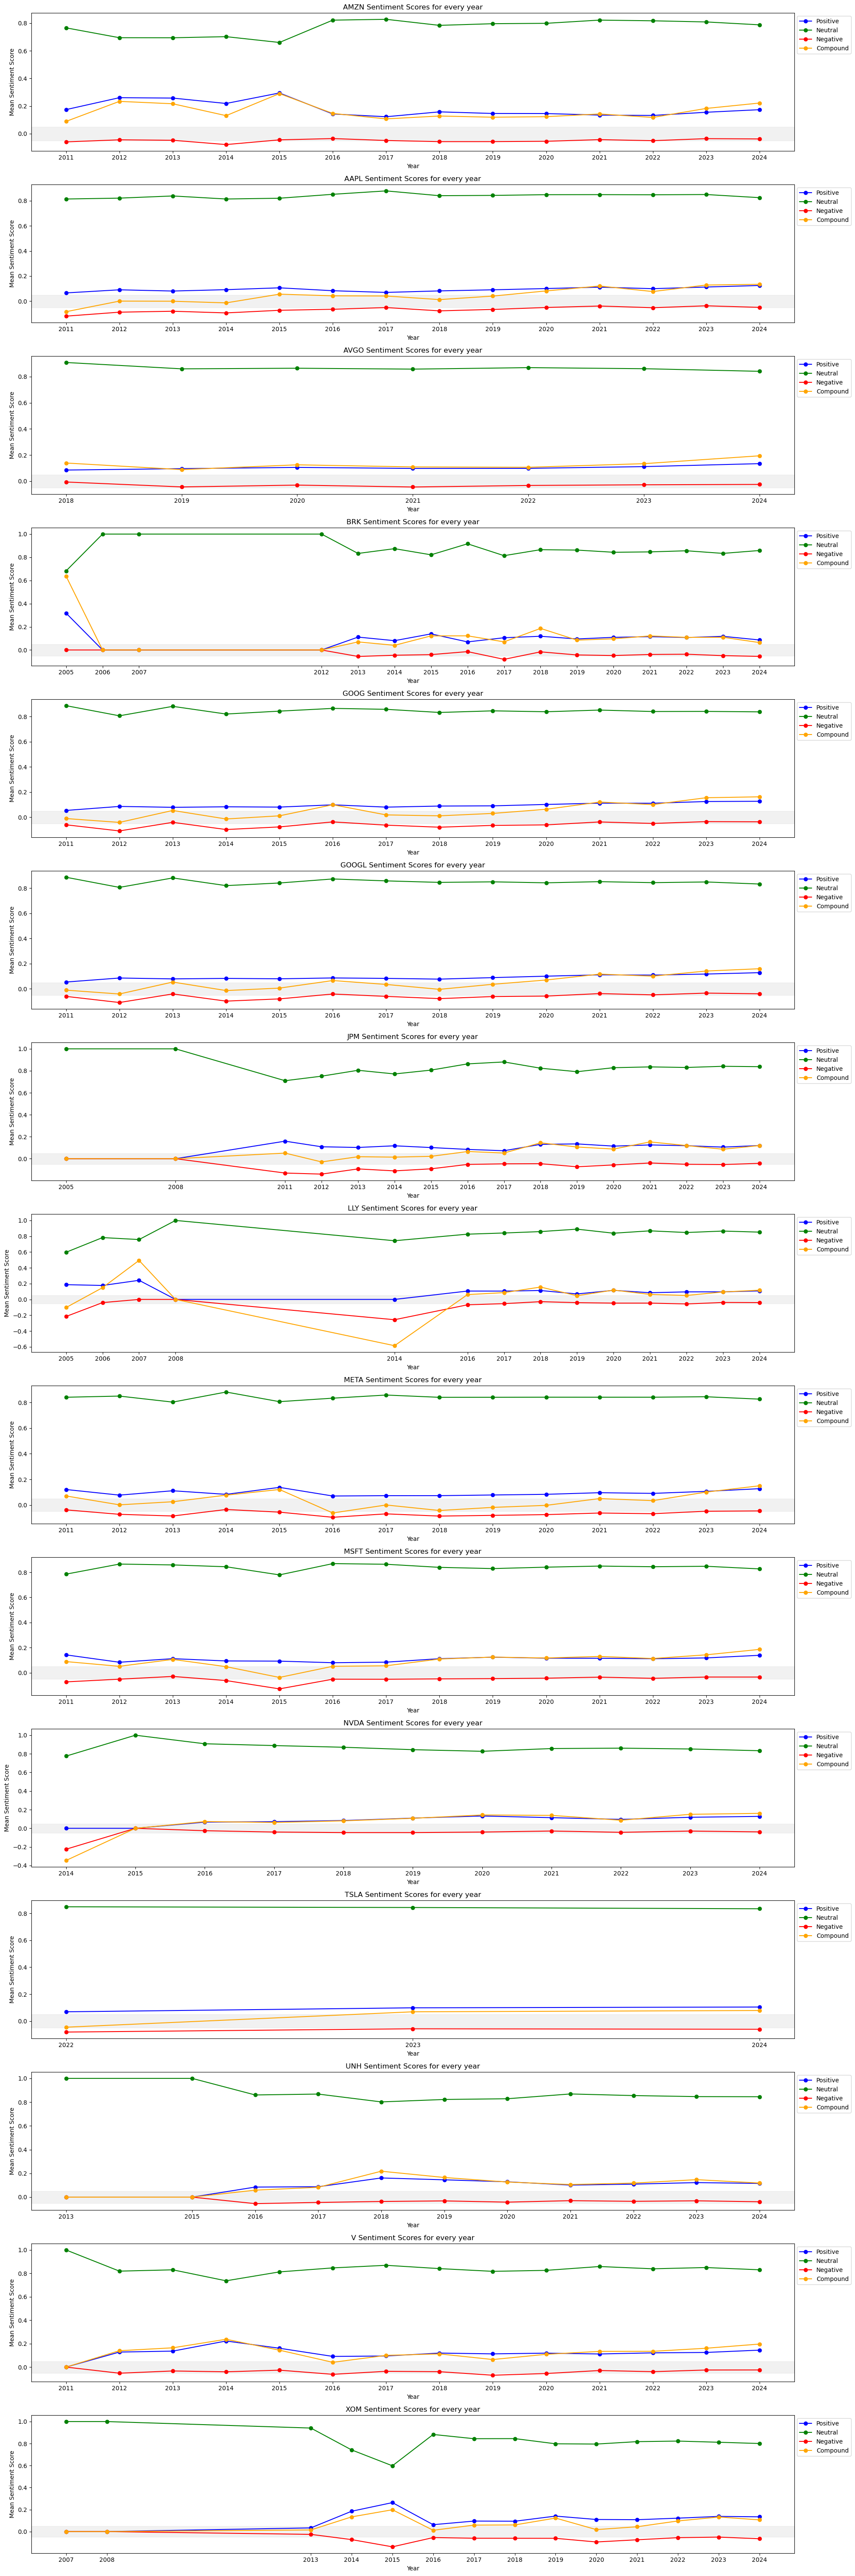

In [24]:
# Create a figure and axes for a 5x3 grid
fig, axes = plt.subplots(nrows=15, ncols=1, figsize=(20, 60))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each stock ticker and its corresponding axis
for idx, ticker in enumerate(stocks_and_sp500):
    # Filter the DataFrame for the current ticker
    stock_data = mean_sentiment_year[mean_sentiment_year['ticker'].str.lower() == ticker]
    
    # Plot mean positivity
    axes[idx].plot(stock_data['year'], stock_data['positivity_text'], marker='o', linestyle='-', color='blue', label='Positive')
    
    # Plot mean neutrality
    axes[idx].plot(stock_data['year'], stock_data['neutrality_text'], marker='o', linestyle='-', color='green', label='Neutral')
    
    # Plot mean negativity (display as negative values)
    axes[idx].plot(stock_data['year'], -stock_data['negativity_text'], marker='o', linestyle='-', color='red', label='Negative')
    
    # Plot mean compound
    axes[idx].plot(stock_data['year'], stock_data['compound_text'], marker='o', linestyle='-', color='orange', label='Compound')
    
    # Add a light grey shaded area from -0.05 to +0.05 on the y-axis
    axes[idx].axhspan(-0.05, 0.05, color='lightgrey', alpha=0.3)
    
    # Set title and labels for each subplot
    axes[idx].set_title(f'{ticker.upper()} Sentiment Scores for every year')
    axes[idx].set_xlabel('Year')
    axes[idx].set_ylabel('Mean Sentiment Score')
    axes[idx].legend(loc='upper left', bbox_to_anchor=(1, 1))
    axes[idx].set_xticks(stock_data['year'].unique())
    axes[idx].tick_params(axis='x', rotation=0) 

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

# Sentimental top15 SP500

Plot for the top15

In [25]:
df_top50 = pd.read_csv('./weights_sp500.csv')
df_top50.rename(columns={'Unnamed: 0' : 'stock'}, inplace=True)
df_top50['stock'] = df_top50['stock'].str.lower()
df_top50.rename(columns={'stock':'ticker'}, inplace = True)
df_top50.head()

ticker    weight
0   aapl  0.100563
1   msft  0.085854
2   amzn  0.067343
3    brk  0.039403
4   goog  0.035115

In [26]:
# get top50 into a list
list_top50 = list(df_top50['ticker'])

In [27]:
df_top50_sentiments = df[df['ticker'].isin(list_top50)]
df_top50_sentiments.head()

ticker                date  \
7519    wfc 2005-07-28 20:02:00   
7520    wfc 2005-10-12 16:22:00   
7521    wfc 2005-12-05 14:37:00   
7522    wfc 2006-01-18 13:07:00   
7523    wfc 2006-02-28 21:02:00   

                                                  title       source  \
7519  Wachovia Announces National Partnerships in Su...  PR Newswire   
7520  Wachovia Announces Securities Lending Appointm...  PR Newswire   
7521   Wachovia Completes SouthTrust Merger Integration  PR Newswire   
7522  Wachovia Securities Expands Real Estate Capita...  PR Newswire   
7523  Nicholas Moore Elected to Wells Fargo & Compan...  PR Newswire   

                                            link_source  positivity_text  \
7519  https://markets.businessinsider.com/news/stock...            0.278   
7520  https://markets.businessinsider.com/news/stock...            0.145   
7521  https://markets.businessinsider.com/news/stock...            0.000   
7522  https://markets.businessinsider.com/news/stock...            0.310   
7523  https://markets.businessinsider.com/news/stock...            0.222   

      neutrality_text  negativity_text  compound_text        stock  \
7519            0.722              0.0         0.4019  Wells Fargo   
7520            0.855              0.0         0.2960  Wells Fargo   
7521            1.000              0.0         0.0000  Wells Fargo   
7522            0.690              0.0         0.3818  Wells Fargo   
7523            0.778              0.0         0.2500  Wells Fargo   

     gisc_sectors  year  month  
7519   Financials  2005      7  
7520   Financials  2005     10  
7521   Financials  2005     12  
7522   Financials  2006      1  
7523   Financials  2006      2

In [34]:
df_top50_sentiments.shape

(221168, 13)

In [28]:
mean_daily_sentiment_top50 = df_top50_sentiments.groupby(['date']).agg({
    'positivity_text': 'mean',
    'neutrality_text': 'mean',
    'negativity_text': 'mean',
    'compound_text': 'mean'
}).reset_index()

mean_daily_sentiment_top50.head()

date  positivity_text  neutrality_text  negativity_text  \
0 2005-01-18 13:07:00            0.000             1.00            0.000   
1 2005-01-19 17:37:00            0.000             1.00            0.000   
2 2005-02-01 16:32:00            0.212             0.53            0.258   
3 2005-02-09 14:27:00            0.000             1.00            0.000   
4 2005-02-24 17:12:00            0.000             1.00            0.000   

   compound_text  
0         0.0000  
1         0.0000  
2        -0.1531  
3         0.0000  
4         0.0000

Plot positivity scores

In [29]:
mean_daily_sentiment_top50_filtered = mean_daily_sentiment_top50[(mean_daily_sentiment_top50['date'].dt.year >= 2016)]
mean_daily_sentiment_top50_filtered

date  positivity_text  neutrality_text  negativity_text  \
4641   2016-01-04 06:37:22            0.224            0.776              0.0   
4642   2016-01-04 19:13:17            0.186            0.814              0.0   
4643   2016-01-04 19:17:17            0.186            0.814              0.0   
4644   2016-01-05 06:03:35            0.000            1.000              0.0   
4645   2016-01-05 11:02:12            0.000            1.000              0.0   
...                    ...              ...              ...              ...   
143804 2024-05-15 21:03:43            0.153            0.847              0.0   
143805 2024-05-15 21:13:14            0.000            1.000              0.0   
143806 2024-05-16 00:45:38            0.000            1.000              0.0   
143807 2024-05-16 10:00:00            0.255            0.745              0.0   
143808 2024-05-16 14:00:36            0.000            1.000              0.0   

        compound_text  
4641           0.3818  
4642           0.1531  
4643           0.1531  
4644           0.0000  
4645           0.0000  
...               ...  
143804         0.2023  
143805         0.0000  
143806         0.0000  
143807         0.3400  
143808         0.0000  

[139168 rows x 5 columns]

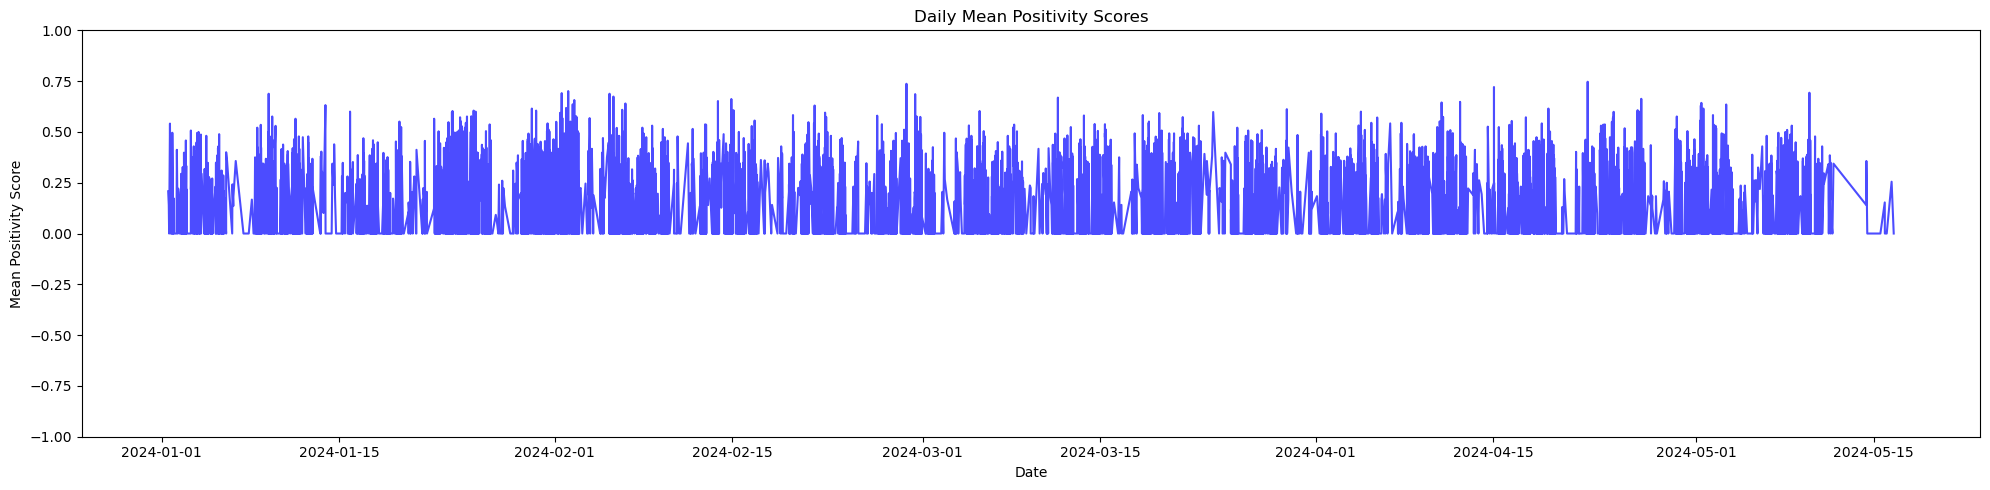

In [31]:
# filter data interval
mean_daily_sentiment_top50_filtered = mean_daily_sentiment_top50[(mean_daily_sentiment_top50['date'].dt.year >= 2024)]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 5))

# Plot positivity text with varying transparency to resemble Brownian motion
ax.plot(mean_daily_sentiment_top50_filtered['date'], mean_daily_sentiment_top50_filtered['positivity_text'], color='blue', alpha=0.7)

# Add a light grey shaded area from -0.5 to +0.5 on the y-axis
# ax.axhspan(-0.05, 0.05, color='lightgrey', alpha=0.3)

# Labeling and titling
ax.set_ylabel('Mean Positivity Score')
ax.set_title('Daily Mean Positivity Scores')

# Set y-axis limits
ax.set_ylim(-1, 1)

# Set x-axis label
ax.set_xlabel('Date')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

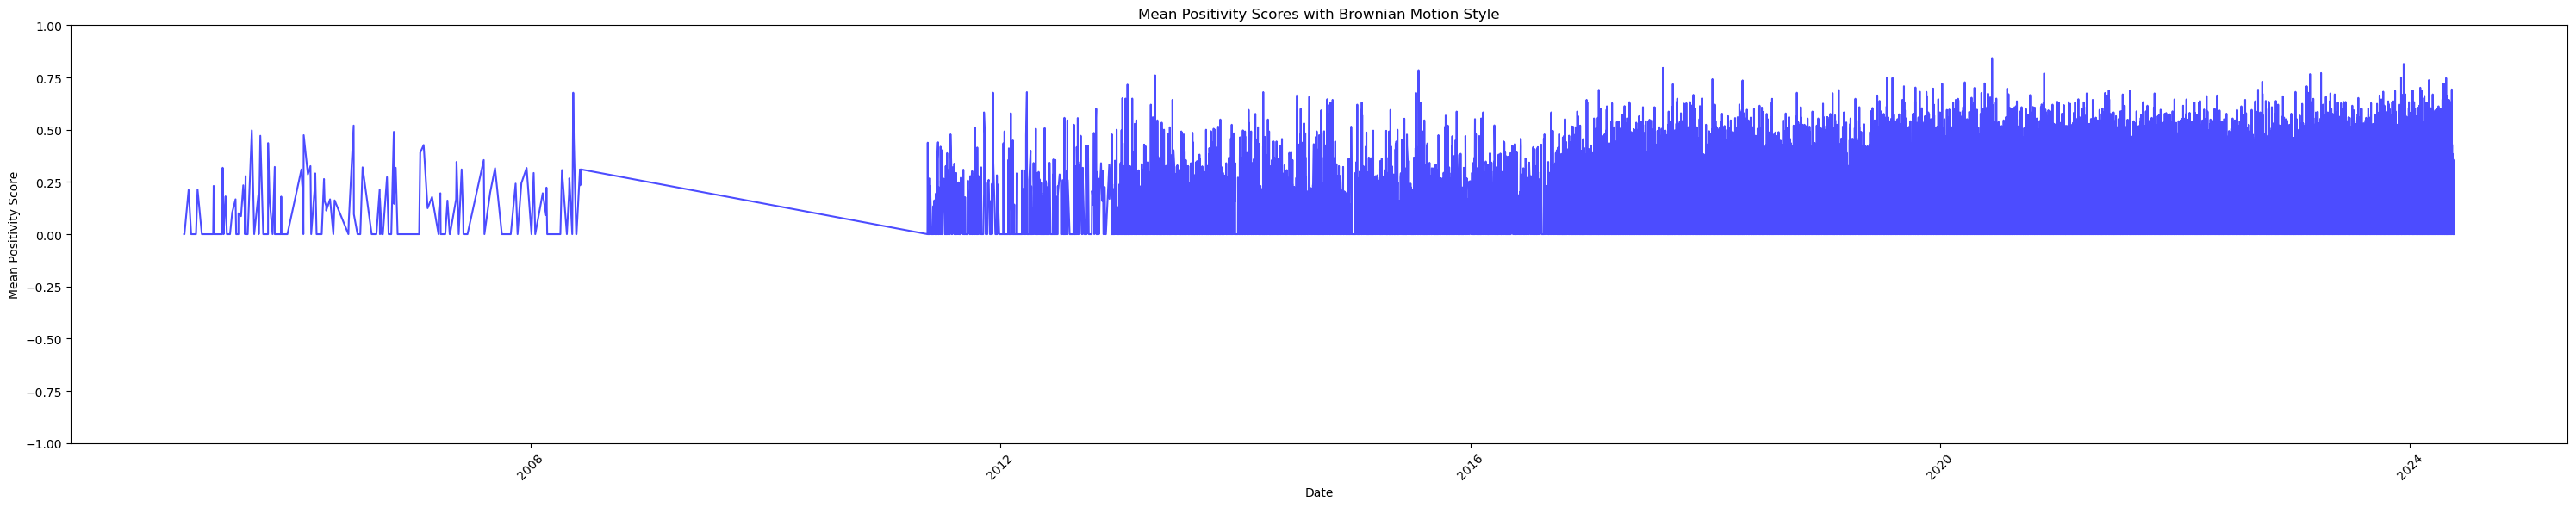

In [33]:
# Plot mean positivity text with varying transparency to resemble Brownian motion
plt.figure(figsize=(30, 6))
plt.plot(mean_daily_sentiment_top50['date'], mean_daily_sentiment_top50['positivity_text'], color='blue', alpha=0.7)

# light grey shaded area from -0.5 to +0.5 on the y-axis
# plt.axhspan(-0.05, 0.05, color='lightgrey', alpha=0.3)

# Labeling and titling
plt.ylabel('Mean Positivity Score')
plt.title('Mean Positivity Scores with Brownian Motion Style')

# Set y-axis limits
plt.ylim(-1, 1)

# Set x-axis label
plt.xlabel('Date')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

# Sentimental for top50 stocks in the SP500

Create weight column, which weight computed previously

In [24]:
# Perform left merge to assign weights
df_merged = pd.merge(df, df_top50, on='ticker', how='left')

# Fill NaN weights with 0
df_merged['weight'].fillna(0, inplace=True)
df_merged.head()

In [26]:
df_merged.to_csv('sp500_news_and_sentimental_weights.csv')